In [2]:
import tensorflow as tf
from six.moves import cPickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


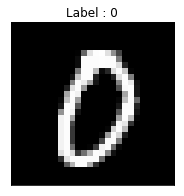

In [3]:
# Check data
train_x, train_y = mnist.train.next_batch(10)
img = train_x[9,:].reshape(28, 28)

plt.figure(figsize=(5, 3))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[9])))
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
n_step = 14
n_input = 28

## LSTM shape
n_lstm1 = 10
n_lstm2 = 10

## Fully connected
n_hidden = 100
n_output = 28

In [5]:
weights = {
    'hidden' : tf.Variable(tf.random_normal([n_lstm2, n_hidden], stddev=0.01)),
    'output' : tf.Variable(tf.random_normal([n_hidden, n_output], stddev=0.01))
}

biases = {
    'hidden' : tf.Variable(tf.random_normal([n_hidden], stddev=0.01)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev=0.01))
}

x = tf.placeholder(tf.float32, [None, n_step, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [6]:
def build_model(x, weights, biases):
    with tf.variable_scope('rnn'):
        # Build RNN network
        with tf.variable_scope('lstm1'):            
            lstm1 = tf.contrib.rnn.BasicLSTMCell(n_lstm1)
            h1, c1 = tf.nn.dynamic_rnn(lstm1, x, dtype=tf.float32)
        with tf.variable_scope('lstm2'):            
            lstm2 = tf.contrib.rnn.BasicLSTMCell(n_lstm2)
            h2, c2 = tf.nn.dynamic_rnn(lstm2, h1, dtype=tf.float32)
            
        # Build classifier
        hidden = tf.add(tf.matmul(h2[:,-1,:], weights['hidden']), biases['hidden'])
        hidden = tf.nn.relu(hidden)
        output = tf.add(tf.matmul(hidden, weights['output']), biases['output'])
        return output

In [7]:
LR = 0.0005

pred = build_model(x, weights, biases)
loss = tf.square(tf.subtract(y, pred))
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [8]:
n_iter = 2500
n_prt = 100

In [12]:
train_x, train_y = mnist.train.next_batch(50)
train_x = train_x.reshape(-1, 28, 28)

print(type(train_x))
print(train_x.shape)

print(train_x[:, 0:14, :].shape)
print(train_x[:, 14].shape)
train_x = np.delete(train_x, 0, 0)

print(train_x.shape)

<class 'numpy.ndarray'>
(50, 28, 28)
(50, 14, 28)
(50, 28)
(49, 28, 28)


In [9]:
# Run initialize
# config = tf.ConfigProto(allow_soft_placement=True)  # GPU Allocating policy
# sess = tf.Session(config=config)
sess = tf.Session()
sess.run(init)

for i in range(n_iter):
    train_x, train_y = mnist.train.next_batch(50)
    train_x = train_x.reshape(-1, 28, 28)
    
    for j in range(n_step):
        # 0 ~ 13 행으로 14행을 prediction해보자
        sess.run(optm, feed_dict={x: train_x[:,j:j+n_step,:],  y: train_x[:,j+n_step]}) 
    if i % n_prt == 0:
        # 마지막 13 ~ 26 행까지에서 28행을 prediction한 거랑 실제 28행과의 loss를 계산해보자 
        c = sess.run(loss, feed_dict={x: train_x[:,13:13+n_step,:],  y: train_x[:,13+n_step]})
        print ("Iter : {}".format(i))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 0.0005420788656920195
Iter : 100
Cost : 0.0012786845909431577
Iter : 200
Cost : 0.0021732556633651257
Iter : 300
Cost : 0.002523701172322035
Iter : 400
Cost : 0.001499653561040759
Iter : 500
Cost : 0.0016478688921779394
Iter : 600
Cost : 0.002511735074222088
Iter : 700
Cost : 0.0019509167177602649
Iter : 800
Cost : 0.002563557354733348
Iter : 900
Cost : 0.0012227698462083936
Iter : 1000
Cost : 0.0015334438066929579
Iter : 1100
Cost : 0.0019261935958638787
Iter : 1200
Cost : 0.0015193894505500793
Iter : 1300
Cost : 0.00013302697334438562
Iter : 1400
Cost : 0.0012610178673639894
Iter : 1500
Cost : 0.002484919736161828
Iter : 1600
Cost : 0.003990019205957651
Iter : 1700
Cost : 0.0009061943856067955
Iter : 1800
Cost : 0.002045021392405033
Iter : 1900
Cost : 0.004554728511720896
Iter : 2000
Cost : 0.0009968430968001485
Iter : 2100
Cost : 0.002273204969242215
Iter : 2200
Cost : 0.0020944394636899233
Iter : 2300
Cost : 0.000756717985495925
Iter : 2400
Cost : 0.0028049207758158

(10, 28, 28)
(14, 28)
(28, 28)


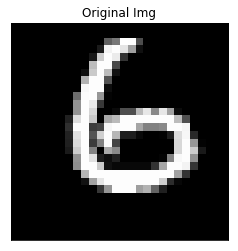

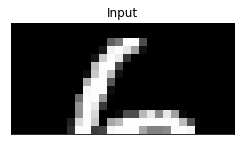

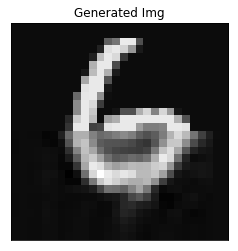

(14, 28)
(13, 28)


In [23]:
test_x, test_y = mnist.test.next_batch(10)
test_x = test_x.reshape(-1, 28, 28)

idx = 0
gen_img = []

sample = test_x[idx, 0:14, :]
input_img = sample.copy()

feeding_img = test_x[idx, 0:0+n_step, :]  

for i in range(n_step):
    test_pred = sess.run(pred, feed_dict={x: feeding_img.reshape(1, 14, 28)})
    feeding_img = np.delete(feeding_img, 0, 0) # axis =0으로 0 번째 행을 없앤다.
    feeding_img = np.vstack([feeding_img, test_pred])
    gen_img.append(test_pred)
    
for i in range(n_step):
    sample = np.vstack([sample, gen_img[i]])
    
print(test_x.shape)    
print(feeding_img.shape)    
print(sample.shape)   
plt.imshow(test_x[idx], 'gray')
plt.title('Original Img')
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(4,3))
plt.imshow(input_img, 'gray')
plt.title('Input')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(sample, 'gray')
plt.title('Generated Img')
plt.xticks([])
plt.yticks([])
plt.show()

feeding_img = test_x[idx, 0:0+n_step, :]  
print(feeding_img.shape)
feeding_img = np.delete(feeding_img, 0, 0)
print(feeding_img.shape)

In [14]:
from RNN import RNN
my_rnn = RNN()
my_rnn.load('./checkpoint/RNN_5000')

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./checkpoint/RNN_5000
Model loaded from file : ./checkpoint/RNN_5000


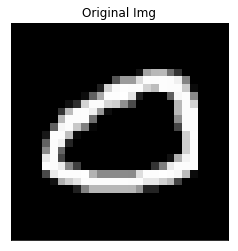

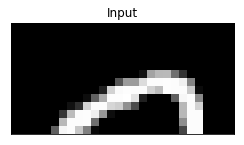

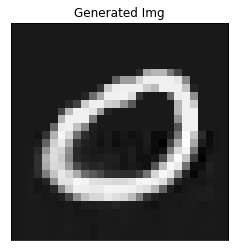

In [17]:
test_x, test_y = mnist.test.next_batch(10)
test_x = test_x.reshape(-1, 28, 28)

sample = test_x[0, 0:14,:]

gen_img = my_rnn.predict(sample)

plt.imshow(test_x[0], 'gray')
plt.title('Original Img')
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(4,3))
plt.imshow(sample, 'gray')
plt.title('Input')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(gen_img, 'gray')
plt.title('Generated Img')
plt.xticks([])
plt.yticks([])
plt.show()